In [17]:
import pandas as pd

In [18]:
df = pd.read_csv('winequality-red.csv', sep=';')


In [19]:
print(df.head())
print(df.columns)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [20]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [21]:
import numpy as np

In [22]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

In [23]:
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [24]:
df.columns = df.columns.str.replace('"', '').str.split(';').str[0]
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [25]:
X = df.drop(columns=['quality'])
y = df['quality']

In [26]:
from sklearn.model_selection import train_test_split

# Eğitim ve test verisi olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.preprocessing import StandardScaler

# Veriyi ölçeklendir
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [29]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [30]:
y_pred = model.predict(X_test_scaled)

In [31]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [32]:
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2 Skoru: {r2}")

MAE: 0.5035304415524375
MSE: 0.39002514396395493
R2 Skoru: 0.4031803412796219


In [43]:
import matplotlib.pyplot as plot

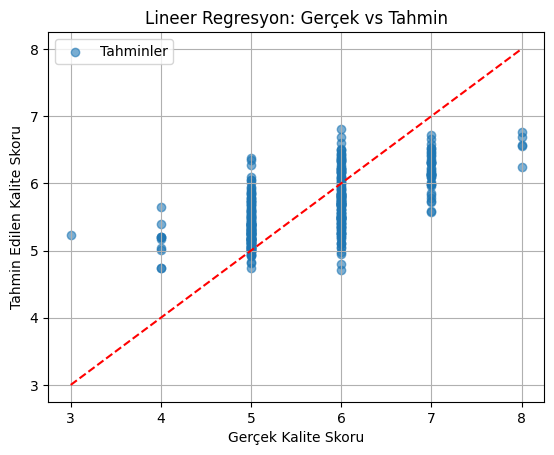

In [45]:
plot.scatter(y_test, y_pred, label="Tahminler", alpha=0.6)
plot.xlabel("Gerçek Kalite Skoru")
plot.ylabel("Tahmin Edilen Kalite Skoru")
plot.legend()

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

plot.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--")

plot.title("Lineer Regresyon: Gerçek vs Tahmin")
plot.grid(True)
plot.show()

In [40]:
coef_df = pd.DataFrame(model.coef_, index=X.columns, columns=['Katsayı'])
print(coef_df)

                       Katsayı
fixed acidity         0.039789
volatile acidity     -0.179439
citric acid          -0.027512
residual sugar        0.009421
chlorides            -0.089084
free sulfur dioxide   0.058015
total sulfur dioxide -0.120008
density              -0.019204
pH                   -0.060610
sulphates             0.146815
alcohol               0.296628


In [46]:
df.to_csv("winequality_cleaned.csv", index=False)
print("Temizlenmiş veri dosyası kaydedildi: winequality_cleaned.csv")

Temizlenmiş veri dosyası kaydedildi: winequality_cleaned.csv


In [48]:
new_wine = {
    "fixed acidity": 7.4,
    "volatile acidity": 0.7,
    "citric acid": 0.0,
    "residual sugar": 1.9,
    "chlorides": 0.076,
    "free sulfur dioxide": 11.0,
    "total sulfur dioxide": 34.0,
    "density": 0.9978,
    "pH": 3.51,
    "sulphates": 0.56,
    "alcohol": 9.4
}


In [49]:
new_df = pd.DataFrame([new_wine])

In [50]:
new_df_scaled = scaler.transform(new_df)

In [51]:
predicted_quality = model.predict(new_df_scaled)
print(f"Tahmin edilen kalite: {predicted_quality[0]:.2f}")

Tahmin edilen kalite: 5.05
